## Assignment: Data Centre Management


### Problem Statement

We are managing two data centres. We aim to buy, sell, and transfer servers, in order to meet customer demand of different types, and maximise profits.

One data centre is low-latency, the other high-latency. There are two types of server, CPU and GPU. Thus, there are four types of demand (low versus high latency) x (CPU versus GPU). Of course, high-latency demand can be satisfied by the low-latency data centre, but not vice versa. 

Demand is in integers, and changes every time-step. Every unit of demand that we satisfy gives us some amount of profit. This amount is different for the four types of demand. A unit of demand that is not satisfied gives us zero profit, of course.

Demand is dynamic, ie changes every time-step, but it is known in advance. Between time-steps we can purchase servers, sell servers, and even transfer servers from one data centre to the other. We assume this is instantaneous. Each server type has a different purchase cost (which costs us money), selling price (which gives money to us), and transfer cost (which costs us money). If data centre 0 chooses to transfer a server to data centre 1, then data centre 1 receives it - it does not need to choose to receive it. 

At the start, we have some number of each server type in each data centre. After the final time-step, we will buy and/or sell servers in order to return to the same number of each that we had at the start. The objective function will implement this automatically, ie the proposed solution doesn't need to do this. As a result, eg for $n=100$ the sequence will look like this:

    [initial servers give profit for day 0] 
    (commands 0 give income and expense) 
    [servers give profit for day 1] 
    (commands 1 give income and expense) 
    ... 
    (commands 99 give income and expense)
    [servers give profit for day 100]
    (automatically generated commands 100 give income and expense)
    [final servers, day 101, no contribution to profit]

And so for $n=100$ we require 100 sets of commands (commands 0-99 inclusive), and the history of how many servers we have will contain 102 items when including the initial day 0 and final day 101.

Our goal is to maximise the total profits.

At each time-step, we have four numerical variables representing the number of servers of each type, and four variables giving the demand at that time-step.

Our task is to solve this problem, comparing multiple algorithms / algorithmic ideas, and variants, and multiple hyperparameter values where appropriate, and report briefly on the results. 

### Data

The data is given in two files, `demand.npy` and `data.txt`.

Notice the values in `data.txt`. These values create a consistent economic model where:

* Low-latency servers are more valuable than high-latency;
* GPU servers are more valuable, more expensive to buy or sell, and more expensive to transfer, than CPU;
* There's a cost associated with moving servers.


### Representation

In the supplied code, a solution is a sequence of buy/sell/transfer commands, for each time-step, for each data centre, for each server type. A data centre can execute multiple commands in the same time-step. For a single time-step we need to represent (2 x 2 x 3) commands. Eg consider these commands for a single time-step:

    1, 2, 3,    4, 5, 6,      7, 8, 9,    10, 11, 12

This means: at this time-step, data centre 0 will:

    Buy 1 CPUs
    Sell 2 CPUs
    Transfer 3 CPUs to dc 1
    Buy 4 GPUs
    Sell 5 GPUs
    Transfer 6 GPUs to dc 1

Data centre 1 will:

    Buy 7 CPUs
    Sell 8 CPUs
    Transfer 9 CPUs to dc 0
    Buy 10 GPUs
    Sell 11 GPUs
    Transfer 12 GPUs to dc 0

We will have n of these rows, 1 per time-step. So, one possible solution representation for a complete solution is an array of (n x 2 x 2 x 3) integers. This is the representation used by the objective function code below.


### Experiments

You are free to use any metaheuristic algorithms, including HC, SA, GA, and/or any variant. You can implement your own, use code from class, or import libraries. You are free to use any encoding, which could be a bitstring encoding, integer encoding, or something else; a genotype-phenotype mapping, a repair mechanism, or similar; and/or custom `init`, `nbr`, and/or `crossover` operators. You are free to use a different objective function **during the run**, but remember that you must use my objective function for the **final evaluation**, for fair comparison of all methods. You are free to use ideas which you or others have suggested in class to improve the algorithms.

For each setup, you should run the setup 5 times with random seeds 0, 1, 2, 3, 4, and compare the mean performance.

If you wish, you can show curves to demonstrate behaviour, such as objective versus iterations, or diversity versus iterations, or specific characteristics of solutions, like total transport costs versus iterations. Some plotting code is supplied below.

### Due date

As announced on Canvas.

### Grading

This assignment is worth 30% of the module. 

* 40-50%: any optimisation algorithm capable of running on this problem and producing a solution, and good understanding of the code and results;
* 50-60%: all of the above, with at least two algorithms and an experiment comparing them;
* 60-70%: all of the above, with a comprehensive experiment on 3+ algorithms, including hyperparameters where suitable, and full understanding of the results;
* 70-85%: all of the above, with 1 or more small algorithmic ideas beyond our basic SA and GA, eg appropriate choice of encoding, well-designed operators and full understanding of algorithms and results;
* 85-100%: all of the above with 1 or more substantial problem-specific algorithmic ideas, such as constructive heuristics, repair operators, genotype-phenotype mappings; brief exploration beyond the problem, eg multi-objective formulations; and well-performing algorithms.

Your report should be written in an `ipynb` file including all your code, results, any necessary graphics and tables, and description. You should include a clear and short statement of (a) the standard algorithms you are using; (b) your novel algorithmic ideas; and (c) the results. As a guideline, I recommend 1000 words of text, and I think it will be possible to provide solutions and experiments in 100-200 lines of code (in addition to the code provided). These are not hard limits.

### Teams

You may work solo, or in a team of 2. If in a team of 2, both students must submit and their submissions must be identical. You may not work together with a student you previously worked with in any other assignment in any other module. To work in a team, one team member must send email to the lecturer at least 2 weeks before the deadline including both members' names and ID numbers, cc-ing the other team member. If you work in a team, both members have to work together on all aspects of the problem: you cannot divide it up between you.

### Reusing code and plagiarism

You may import libraries if they can be directly installed using Anaconda or pip. 

You may not use substantial amounts of code from the internet, but short snippets are allowed, with citation, ie a URL in a comment to show exactly what code was sourced from where. It is not sufficient to include a list of sources at the bottom of your notebook, as that does not show exactly what code was sourced from where.

You may discuss work with others, but you may not look at work by others or show your work to others. 

You may not use AI-generated code.

### Interviews and work-in-progress

After submission, we will hold very short interviews. Where a student or team cannot answer questions about their own work at interview, they will lose substantial marks.

You should show me your work in progress during labs, and tell me in particular what standard and non-standard algorithmic ideas you plan to use, and tell me if you are working in a team. Where a student shows good understanding of their own work in progress during labs they may not need to come to interview.

### Imports, util functions, and problem data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import random
import itertools
from tqdm import tqdm
import random
import pyprobs.probability as pr

# display all rows of a dataframe (for taking a look at the results)
pd.set_option('display.max_rows', None)

In [2]:
def load_data(filename):
    return eval(open(filename).read())

In [3]:
n, initial_servers, constants = load_data('data.txt')
demand = np.load('demand.npy')
# demand

In [4]:
def plot_demand(demand):
    # plot the demand of each type at each time-step

    fig, ax = plt.subplots(2, 2, figsize=(8, 6))
    for data_centre in range(2):
        for server_type in range(2):
            ax[data_centre, server_type].plot(range(1, n+1), demand[:, data_centre, server_type], label=('demand'))
            ax[data_centre, server_type].set_xlabel('Time-steps')
            ax[data_centre, server_type].set_title(f'Demand: Data centre {data_centre}; Server type {server_type}')
    ax[data_centre, server_type].legend()
    plt.tight_layout()   

def plot_history(demand, server_history, solution):
    # plot the demand of each type, the 'stock' or number of servers of each type,
    # and the solution's commands, at each time-step
    fig, ax = plt.subplots(2, 2, figsize=(8, 6))
    for data_centre in range(2):
        for server_type in range(2):
            # the demand has values from 0 to n-1
            ax[data_centre, server_type].plot(range(n), demand[:, data_centre, server_type], label=('demand'))
            # the server history has values from 0 to n+1
            ax[data_centre, server_type].plot(range(n+2), server_history[:, data_centre, server_type], label='stock')
            for i, command in enumerate(['buy', 'sell', 'transfer']):
                # the solution contains commands from 0 to n-1 (doesn't include final time-step)
                ax[data_centre, server_type].plot(range(1, n+1), solution[:, data_centre, server_type, i], label=command)
            ax[data_centre, server_type].set_xlabel('Time-steps')
            ax[data_centre, server_type].set_title(f'History: Data centre {data_centre}; Server type {server_type}')
    ax[data_centre, server_type].legend()
    plt.tight_layout()

def plot_optimisation(history):
    # plot the value of profit at each step of our optimisation
    # NB, don't confuse the time-steps of the data centre simulation
    # with the steps of the optimisation!
    plt.plot(history[:, 0], history[:, 1])
    plt.xlabel('Iterations')
    plt.ylabel('Profit')
    plt.tight_layout()

In [5]:
n

100

In [6]:
initial_servers

array([[10,  5],
       [ 8,  4]])

In [7]:
constants

{'purchase_cost': array([100, 200]),
 'selling_price': array([ 80, 160]),
 'transfer_cost': array([10, 20]),
 'profit_per_demand': array([[5, 8],
        [3, 6]])}

In [8]:
demand.shape

(100, 2, 2)

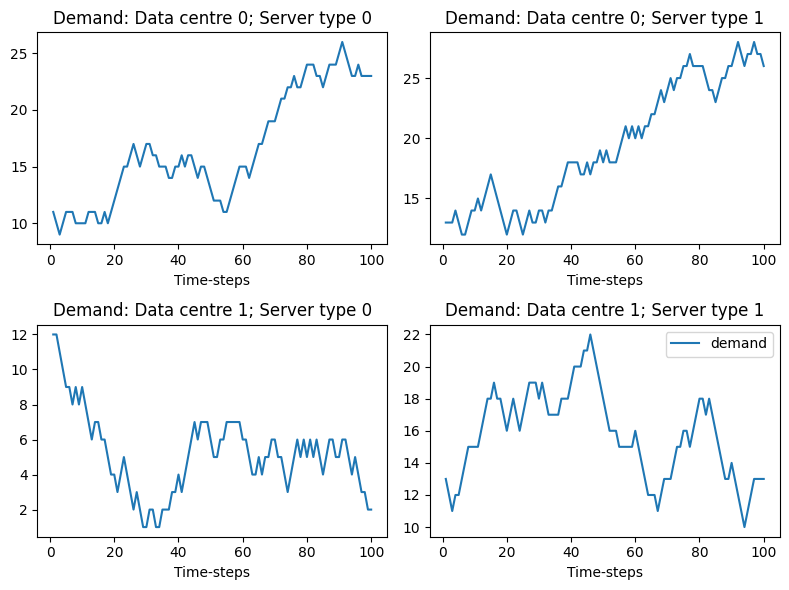

In [9]:
plot_demand(demand)

### Objective function

In [10]:
def calculate_total_profit(solution, initial_servers, demand, constants, return_history=False):
    '''
    Calculate the total profit for a given solution in the data center server optimization problem.
    
    Parameters:
    solution (np.array): Array of shape (n, 2, 2, 3) representing the buy/sell/transfer decisions
    initial_servers (np.array): Array of shape (2, 2) representing initial server counts for each data center and type
    demand (np.array): Array of shape (n, 2, 2) representing daily demand for each data center and server type
    constants (dict): Dictionary containing constant values for the problem
    return_history (bool): whether to return a history showing behaviour during the time-steps
    
    Returns:
    tuple: (total_profit, server_history)
        total_profit (float): Total profit
        server_history (np.array): Array of shape (n+1, 2, 2) representing server counts at each time step

    NB: I used Claude.AI to help generate parts of this code.
    '''
    # Solution should have 1 row for each time-step, else it is invalid
    if solution.shape[0] != n: return -100000
    
    # Unpack constants
    purchase_cost = constants['purchase_cost']
    selling_price = constants['selling_price']
    transfer_cost = constants['transfer_cost']
    profit_per_demand = constants['profit_per_demand']
    
    total_profit = 0
    current_servers = initial_servers.copy()
    server_history = np.zeros((n+2, 2, 2)) # NB n+2 due to special initial and final days
    server_history[0] = current_servers
    
    for day in range(n+1):

        # Calculate profit from satisfying demand for today
        for dc in range(2):
            for server_type in range(2):

                if day != n:
                    satisfied_demand = min(current_servers[dc, server_type], demand[day, dc, server_type])
                    total_profit += satisfied_demand * profit_per_demand[dc, server_type]
                
                    # High-latency demand can be satisfied by low-latency data center
                    # but we have to be careful! The code below is thanks to James Conroy (class MScAI 2024-25)
                    # and fixes a bug in the original ipynb.

                    # dc == 0 means low-latency data center
                    # demand[day, 1, server_type] > current_servers[1, server_type] means high-latency DC 1 has more demand than it can fulfill
                    if dc == 0 and demand[day, 1, server_type] > current_servers[1, server_type]:
                        # remaining_capacity_dc0 is the capacity of low-latency DC 0 after doing satisfied_demand
                        remaining_capacity_dc0 = current_servers[dc, server_type] - satisfied_demand
                        # excess_demand_dc1 is the excess demand at high-latency DC 1 beyond what it can satisfy - this is positive, because the if-condition checks it
                        excess_demand_dc1 = demand[day, 1, server_type] - current_servers[1, server_type]
                        # extra_satisfied_demand_dc0 is some portion of high-latency demand excess_demand_dc1 pushed to low-latency server DC 0
                        extra_satisfied_demand_dc0 = min(remaining_capacity_dc0, excess_demand_dc1)
                        # the addition to profit is multiplied by the high-latency profit value, DC 1, because the customer didn't *ask* for low-latency DC.
                        total_profit += extra_satisfied_demand_dc0 * profit_per_demand[1, server_type]

        # Apply buy/sell/transfer decisions
        for dc in range(2):  # For each data center
            for server_type in range(2):  # For CPU and GPU

                if day == n:
                    # on the last day, special transaction, not specified
                    # in the solution, bring us back to initial server values
                    diff = current_servers[dc, server_type] - initial_servers[dc, server_type]
                    if diff > 0:
                        cmds = (0, diff, 0)
                    else:
                        cmds = (-diff, 0, 0)
                else:
                    cmds = solution[day, dc, server_type]

                # Buy
                current_servers[dc, server_type] += cmds[0]
                total_profit -= cmds[0] * purchase_cost[server_type]
                
                # Sell (avoid over-selling, ie selling servers we don't have)
                sell_amount = min(cmds[1], current_servers[dc, server_type])
                current_servers[dc, server_type] -= sell_amount
                total_profit += sell_amount * selling_price[server_type]
                
                # Transfer (avoid over-transferring)
                transfer = min(cmds[2], current_servers[dc, server_type])
                current_servers[dc, server_type] -= transfer
                current_servers[1-dc, server_type] += transfer
                total_profit -= transfer * transfer_cost[server_type]
        
        # Record server counts for following day
        server_history[day+1] = current_servers
    
    if return_history:
        return total_profit, server_history
    else:
        return total_profit


In [11]:
def f(x, return_history=False):
    # a 'shim' function because our algorithms expect f() to have a single argument, x
    return calculate_total_profit(x, initial_servers, demand, constants, 
                                  return_history=return_history)

### Example usage: a random solution

Total profit: -13833


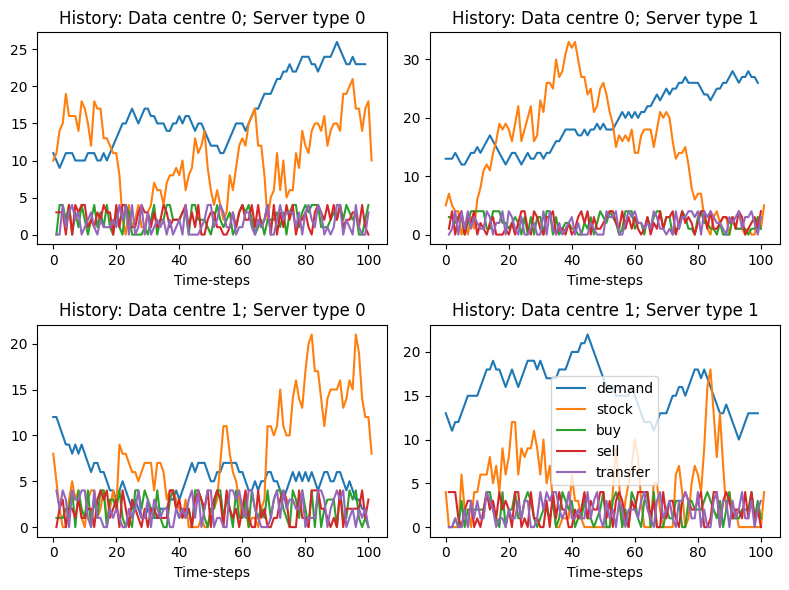

In [12]:
# Generate a random solution for demonstration
# Every buy/sell/transfer command is a random integer, 0-4 inclusive
solution = np.random.randint(0, 5, size=(n, 2, 2, 3))
total_profit, server_history = f(solution, return_history=True)
print(f'Total profit: {total_profit}')
plot_history(demand, server_history, solution)

### Example usage: a 'do-nothing' solution

Total profit: 12904.0


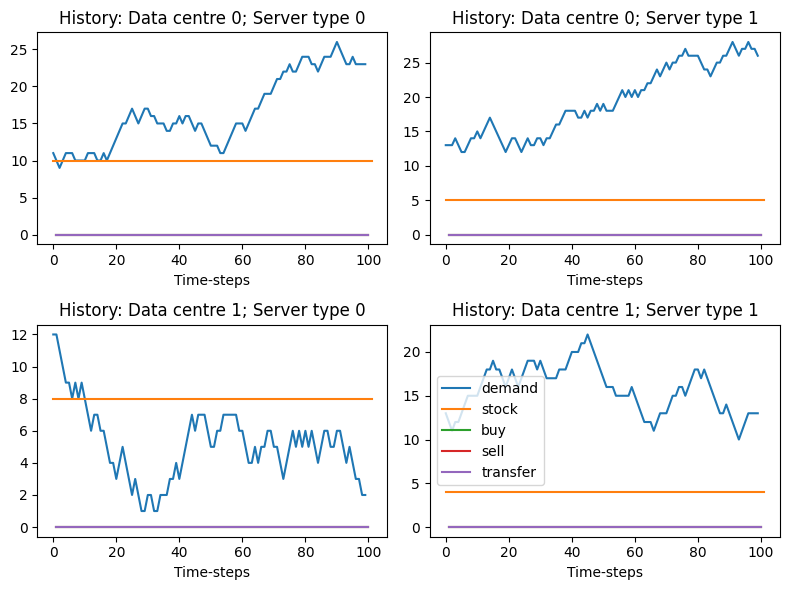

In [13]:
# Now try a 'do-nothing' solution for comparison, ie all buy/sell/transfer commands are zero
solution = np.zeros((n, 2, 2, 3))
total_profit, server_history = f(solution, return_history=True)
print(f'Total profit: {total_profit}')
plot_history(demand, server_history, solution)

-------------------------------------------------------------------

# Assignment Solution

### Init & Decode Functions

The functions `decode_int_to_binary` and `decode_binary_to_int` are used to convert the integer representation of the solution array to binary and vice versa. These functions are utilized in the optimization algorithms when testing binary encoding. We chose one byte to represent one integer because a single byte can represent integers up to 256, which should be sufficient for this problem.

The `init` function is responsible for generating a random solution array consisting of zeros and ones. Even the "do nothing" solution, where the solution array is entirely zeros, yields a decent profit of around 12000. Moreover, some initial tests revealed that higher values are not particularly beneficial for profit. Based on this observation, our `init` function is designed to generate a random solution array with only zeros and ones.

In [14]:
# decode integer solution into binary
def decode_int_to_binary(int_arr):
    '''Convert an array of integers into an array of binary values. Shape (x,) -> (x, 8); (x, y,) -> (x, y, 8)'''
    int_arr = int_arr.astype(np.uint8)
    int_arr_shape = int_arr.shape # for shape restoration
    bin_arr = np.unpackbits(int_arr.flatten()) # flatten to 1D, then unpack
    bin_arr = bin_arr.reshape((*int_arr_shape, 8))
    return bin_arr

# decode binary solution into integer
def decode_binary_to_int(bin_arr):
    '''Convert an array of binary values into an array of integers. Shape (x, 8) -> (x,); (x, y, 8) -> (x, y,)'''
    bin_arr_shape = bin_arr.shape # for shape restoration
    int_arr = np.packbits(bin_arr.flatten())
    int_arr = int_arr.reshape(bin_arr_shape[:-1])
    return int_arr

# init functions, again both integer and binary
def integer_init():
    return np.random.randint(0, 2, size=(n, 2, 2, 3))

### Neighbour Functions

#### Integer

For our assignment, we designed four integer neighbour functions, intending on having varying levels of exploration. Each neighbour function also took `zero_prob` as an argument, which represents the probability that, should a zero be encountered in the solution, that zero would be incremented by one. The reasoning behind this was that, at the beginning of the assignment, we made the assumption that if the data centres were not changing much, they would be more profitable. 

- The first we defined was to increment or decrement one value by one point in all time steps for any given solution (`int_nbr_every_day`). 
- The second was to increment or decrement one value by one point in one time step for any given solution (`int_nbr_one_day`).
- The third works by incrementing or decrementing one value per data centre (2 values per time step) for any given solution (``int_nbr_both_dc_everyday``).
- The final one works by incrementing or decrementing every value by one, for every timestep for any given solution (``int_nbr_everything``). 

With these neighbour functions, we tried to provide a variety of levels of exploration, with the assumption in mind that different functions may perform better or worse than others for certain algorithms. 

In [15]:
#code adapted from lab 2 solutions
def int_nbr_every_day(arr, zero_prob):

    for i in range(arr.shape[0]):

        #copying, flattening of solution for ease of processing
        arr = arr.copy() 
        data = arr[i].flatten()

        #generates random index to change and an operation to use on it
        ind = random.randint(0, 11)
        operator = random.choice([1, -1])

        if data[ind] == 0:
            if pr.Probability.prob(zero_prob): #mutates ((ZeroProb)*100)% of 0's encountered
                data[ind] += 1
            else:
                continue
        elif operator == 1:
            data[ind] += 1
        else:
            data[ind] -= 1
        
        #reshapes back into original time step shape
        arr[i] = data.reshape(2,2,3)

    return arr



def int_nbr_one_day(arr, zero_prob):

    arr = arr.copy()

    #generates random data to perform operation on
    day = random.randint(0,99)
    day_data = arr[day].flatten()

    ind = random.randint(0, 11)
    operator = random.choice([1, -1])

    if day_data[ind] == 0:
        if pr.Probability.prob(zero_prob):
            day_data[ind] += 1
    elif operator == 1:
        day_data[ind] += 1
    else:
        day_data[ind] -= 1
    
    arr[day] = day_data.reshape(2,2,3)

    return arr


def int_nbr_both_dc_everyday(arr,zero_prob):

    arr = arr.copy()
    flat = arr.flatten()

    #alters one in every 6 values in flattened solution array 
    for i in range(0, len(flat), 6):
        ind = random.randint(0, 5)
        operator = random.choice([1, -1])

        if flat[i + ind] == 0:
            if pr.Probability.prob(zero_prob):
                flat[i + ind] += 1
        elif operator == 1:
            flat[i + ind] += 1
        else:
            flat[i + ind] -= 1

    arr = flat.reshape(100, 2, 2, 3)

    return arr
    
#most explorative
def int_nbr_everything(arr, zero_prob):

    flat = arr.flatten()
    
    #alters every value in flattened array
    for i in range(len(flat)):
        operator = random.choice([1,-1])

        if flat[i] == 0:
            if pr.Probability.prob(zero_prob):
                flat[i] += 1
        elif operator == 1:
            flat[i] += 1
        else:
            flat[i] -= 1

    arr = flat.reshape(100,2,2,3)


    return arr

#### Binary

The binary neighbour functions are designed following the same pattern as the integer neighbour functions. There are four different neighbour functions, each based on the same concepts of altering the integer neigbours:

- One value in the entire solution (1 change)
- One value every day (100 changes)
- All values in the array (1200 changes)
- One value per data center every day (200 changes)

The binary functions are slightly more exploratory compared to the integer functions. This difference arises because, instead of simply increasing or decreasing values by one, we flip bits. When converting back to an integer, the index of the flipped bit becomes crucial. These neighbour functions can be quite explorative, especially when they flip bits that represent higher values in the integer representation.

For this reason, it is not entirely random which bit gets flipped. We introduce a hyperparameter `k=6` that influences, with a certain probability, which index of the byte is flipped. Specifically, for `_ in the range k`, we generate a list of random integers between 0 and 7. The maximum value from this list determines the index of the byte that gets flipped. This approach makes it more likely to flip the higher bits, which correspond to smaller changes when converted back to the integer representation. 

In [16]:
def bin_nbr_one_flip(arr, _, k=6):   
    'changes one bit in the whole arr (1 out of 1200)'
    arr_shape = arr.shape
    arr = arr.flatten()

    # reshape to (1200, 8)
    arr = arr.reshape(np.prod(arr_shape[:-1]), 8)

    # select random 8 bit number
    random_byte_index = random.randint(0, arr.shape[0]-1)
    # select random bit index (with more probability of selecting higher index)
    random_bit_index = max(random.randint(0, 7) for _ in range(k))

    # perform the flip
    arr[random_byte_index][random_bit_index] = 1 - arr[random_byte_index][random_bit_index]
    
    return arr.reshape(arr_shape)


def bin_nbr_one_flip_every_day(arr, _, k=6):   
    'changes one bit for all days -> 100 operations'
    arr = arr.copy()

    for i in range(arr.shape[0]):
        arr[i] = bin_nbr_one_flip(arr[i], k) # since bin_nbr_one_flip is written dynamically

    return arr


def bin_nbr_modify_everything(arr, _, k=6):
    'changes bit for every operation every day'

    arr = arr.copy()
    arr_shape = arr.shape
    arr = arr.reshape(np.prod(arr_shape[:-1]), 8)

    for i in range(arr.shape[0]):

        random_bit_index = max(random.randint(0, 7) for _ in range(k))
        arr[i][random_bit_index] = 1 - arr[i][random_bit_index]

    return arr.reshape(arr_shape)


def bin_nbr_both_dc_everyday(arr, _, k=6):   
    'changes one bit for all days -> 100 operations'
    arr = arr.copy()

    for i in range(arr.shape[0]):
        for dc in range(2):
            arr[i][dc] = bin_nbr_one_flip(arr[i][dc], k)
            
    return arr

## Algorithm Implementations

### Hill Climbing

This is our first, and most basic algorithm, a hill climbing algorithm, in which we have made a few customisations for the specific problem at hand. Firstly, it has been generalised to take either binary or integer encoded solutions, using our predefined decoder functions, in order to minimise code re-writing. Secondly, we added a simple progress bar for tracking progress for each iteration. Finally, it also incorporates our zero mutation probability hyperparameter into the neighbour function call.

In [17]:
# HC Function adapted from lab solutions
def HC(f, init, nbr, its,zero_prob):
    '''
    f: objective function X -> R
    init: function giving random element x of X
    nbr: function X -> X, giving a neighbour of x
    its: number of iterations
    '''
    # setting up the binary decoder
    decoder_b2i = decode_binary_to_int if 'bin' in nbr.__name__ else lambda x: x 
    decoder_i2b = decode_int_to_binary if 'bin' in nbr.__name__ else lambda x: x 
    
    history = []
    x = decoder_i2b(init()) # init random vector
    fx = f(decoder_b2i(x)) # calculates profit

    for _ in tqdm(range(its), desc=f'Hill Climbing with {nbr.__name__}, zero_prob({zero_prob})', leave=True):
        xnew = nbr(x,zero_prob) # make new point by changing choosing a defined neighbour
        fxnew = f(decoder_b2i(xnew)) # calculates profit

        if fxnew > fx: # if it's better
            x = xnew # step to the new point
            fx = fxnew
            
        history.append(fx)

    return decoder_b2i(x), history

### Simulated Annealing

For the Simulated Annealing algorithm, the code, which again was adapted from the code in the lab solution, was also customised in a number of minor ways. Again, similarly to the HC function, decoders were instantiated to deal with both integer and binary encodings with the same function body. Further, we also again added a progress bar for visualisation purposes, as well as a description to show which Temperature and Alpha values are in use, which will come in handy during future experiments.

In [18]:
# code adapted from lab 03 solutions
def SA(f, init, nbr, its, T, alpha, zero_prop):

    # setting up the binary decoder
    decoder_b2i = decode_binary_to_int if 'bin' in nbr.__name__ else lambda x: x 
    decoder_i2b = decode_int_to_binary if 'bin' in nbr.__name__ else lambda x: x 
    
    history = []
    x = decoder_i2b(init())
    fx = f(decoder_b2i(x))
    bestx = x
    bestf = fx
    T = T # initial temperature
    alpha = alpha # temperature decay per iteration

    #tqdm loading bar and run description prints
    for _ in tqdm(range(its), desc=f'Simulated Annealing with: {nbr.__name__}, temp({T}), alpha({alpha}), zero_prop({zero_prop})', leave=True):
        xnew = nbr(x, zero_prop) # generate a neighbour of x
        fxnew = f(decoder_b2i(xnew))
        
        if (fxnew > fx or random.random() < np.exp((fxnew - fx) / T)):          
            x = xnew
            fx = fxnew

        if fx > bestf:
            bestf = fx
            bestx = x

        history.append(bestf)
        T *= alpha
        
    return decoder_b2i(bestx), history

### Genetic Algorithm

Lastly of our base algorithms, we also adapted the GA from the solutions provided from the lab exercise sheets, naturally with a few changes. We firstly, as before, added our progress bar and prints for clarity. 

Then, our most substantial change to this algorithm was the implementation of elitism. Our function operates by taking in a configurable number of the elite to be selected, after the population is sorted by their fitness metric. When the elites are extracted from the population, they then also have the possibility of being mutated (pmut) slightly by the nbr function in use on the current run. This is done in an attempt to prevent stagnation. 

The crossover function we used for the experiment was a standard uniform crossover function. We decided to only use one crossover function for our experiment in an attempt to keep experiments at a feasible length. The same approach was also taken in regard to our standard selection function, tournament selection.

In [19]:
# code adapted from Lab04 solutions
def GA(f, init, nbr, crossover, enum, select, popsize, ngens, pmut, zero_prop):

    # history mechanism. best_ever is (f(x), x) (mirroring the structure in the population)
    best_ever = (-np.inf, None)
    hist = []

    # make initial population
    pop = [init() for _ in range(popsize)]
    pop = [(f(x), x) for x in pop]#fitnesses

    #tqdm loading bar and prints again
    for _ in tqdm(range(1, ngens), desc=f'Genetic Algorithm with: {nbr.__name__}, {crossover.__name__}, {select.__name__}, enum ({enum}), popsize ({popsize}), pmut ({pmut}), ngens ({ngens}), zero_prop({zero_prop})', leave=True):
        # make an empty new population
        children = []

        #making of new generation
        while len(children) < popsize:
            
            #selection of best individuals for automatic qualification for next gen
            if len(children) == 0:
                elites = elitism_selection(pop, enum)#tuneable elitism
                for e in elites:
                    if random.random() < pmut:
                        e = nbr(e[1], zero_prop)
                    else: 
                        e = e[1]
                    children.append(e)  # append the genome, not the fitness

            #normal selection and crossover process to fill the rest of the generation
            p1 = select(pop)[1]
            p2 = select(pop)[1]

            c1, c2 = crossover(p1, p2)

            # apply mutation to only a fraction of individuals
            if random.random() < pmut:
                c1 = nbr(c1, zero_prop)
            if random.random() < pmut:
                c2 = nbr(c2, zero_prop)

            # add the new individuals to the population
            children.append(c1)

            # ensure we don't make newpop of size (popsize+1)
            if len(children) < popsize:
                children.append(c2)

        # overwrite old population with new, evaluate, do stats
        pop = children
        pop = [(f(x), x) for x in pop] # new fitness evaluations
        
        # max will get the ind (f(x), x) with highest f(x)
        best = max(pop, key=lambda fx_x: fx_x[0])
        # compare against best_ever and add to history
        if best[0] > best_ever[0]:
            best_ever = best
        hist.append(best_ever[0])
        
    # return the best individual ever (just x, not f(x)) and the numerical array hist
    return best_ever[1], np.array(hist)


# code adapted from lab04 solutions
def uniform_crossover(p1, p2):
    c1, c2 = [], []
    for i in range(len(p1)):
        #randomly samples evenly from both parents to make the children
        if random.random() < 0.5:
            c1.append(p1[i]); c2.append(p2[i])
        else:
            c1.append(p2[i]); c2.append(p1[i])
    return np.array(c1), np.array(c2)


#code adapted from lab04 solutions
def tournament_select(pop, size):
    candidates = random.sample(pop, size)#random sample of number 'size'
    winner = max(candidates, key=lambda ind: ind[0])
    return winner


#elitism function
def elitism_selection(pop, num):
    sorted_pop = sorted(pop, key=lambda ind: ind[0], reverse=True)#sorts pop by fitness 
    return sorted_pop[:num]#returns the best 'num'


## Experiments

All discussed results are based on running 5 seeds for each algorithm and averaging the individual results. The seeds also ensure that the results are reproducible. To facilitate this, we implemented a `set_seed` function.

To run the experiments and compare the algorithms, we created a function called `run_experiment`. This function takes as input the algorithm, a parameter dictionary, a list of neighbour functions, the objective function, and a path to save the results. Within the parameter dictionary, the algorithm hyperparameters are stored in lists, allowing us to run multiple experiments with different hyperparameter combinations.

The `run_experiment` function iterates over all given combinations of neighbour functions and hyperparameters 5 times (once for each seed) and saves the results in a CSV file. Saving the results in a CSV file makes it easy to load and compare them later, without needing to rerun the entire experiment.

Since the hyperparameters vary depending on the algorithm, we use an `if` statement to select the appropriate algorithm (HC, SA, or GA) based on the provided hyperparameters.

In [20]:
#helper function for random seed setting
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)

#generalised experiment function for all algorithms
def run_experiment(algorithm, params, nbr_funcs, objective, path):

    results_df = pd.DataFrame()
   
    for nbr_func in nbr_funcs:
        for seed in range(5):
            print(f'Seed: {seed}')
            #Genetic Algorithm
            if 'pop_size' in params: 
                for crossover, select, its, pop, enum, mut,tsize, zp in itertools.product(
                                                                            params['crossovers'], 
                                                                            params['selections'], 
                                                                            params['it_list'], 
                                                                            params['pop_size'], 
                                                                            params['enum'],
                                                                            params['pmut'],
                                                                            params['t_size'],
                                                                            params['zero_probs']
                                                                        ):
                    set_seed(seed)
                    ngens = int(its/pop)
                    best_solution, _ = algorithm(
                                            f=objective, 
                                            init=params['init'], 
                                            nbr=nbr_func, 
                                            enum=enum,
                                            crossover=crossover,
                                            select=lambda pop: select(pop, tsize), 
                                            popsize=pop,
                                            ngens=ngens, 
                                            pmut=mut,
                                            zero_prop=zp
                                        )
                    total_profit, _ = f(best_solution, return_history=True)
                    results = {'total_profit': total_profit, 
                               'algorithm': algorithm.__name__, 
                               'nbr_func': nbr_func.__name__, 
                               'its': its, 'seed': seed, 
                               'elitism_enum':enum, 
                               'crossover':crossover.__name__,
                               'selection':select.__name__, 
                               'popsize':pop, 
                               'tsize':tsize,
                               'pmut':mut, 
                               'zero_prob':zp
                               }
                    results_df = pd.concat([results_df, pd.DataFrame([results])], ignore_index=True)
                    results_df.to_csv(path)

            # Simulated Annealing
            elif 'T' in params:  
                for its , T, a, zp in itertools.product(params['it_list'], params['T'], params['a'], params['zero_probs']):
                    set_seed(seed)
                    best_solution, _ = algorithm(objective, params['init'], nbr_func, its, T, a, zp)
                    total_profit, _ = f(best_solution, return_history=True)
                    # saving the results
                    results = {'total_profit': total_profit, 
                               'algorithm': algorithm.__name__, 
                               'nbr_func': nbr_func.__name__, 
                               'its': its, 
                               'seed': seed, 
                               'temperature':T, 
                               'alpha':a, 
                               'zero_prob':zp
                               }
                    results_df = pd.concat([results_df, pd.DataFrame([results])], ignore_index=True)
                    results_df.to_csv(path)

            # Hill Climbing
            else: 
                for its , zp in itertools.product(params['it_list'], params['zero_probs']):
                    set_seed(seed)
                    best_solution, _ = algorithm(objective, params['init'], nbr_func, its, zp)
                    total_profit, _ = f(best_solution, return_history=True)
                    # saving the results
                    results = {'total_profit': total_profit, 
                               'algorithm': algorithm.__name__, 
                               'nbr_func': nbr_func.__name__, 
                               'its': its, 
                               'seed': seed, 
                               'zero_prob':zp
                               }
                    results_df = pd.concat([results_df, pd.DataFrame([results])], ignore_index=True)
                    results_df.to_csv(path)


### Run and Evaluate HC and SA

In the following cells are the full sets of hyperparameters and experiments used for our initial HC and SA runs. For these runs, all neighbour functions were used, in an attempt to understand their performance and characteristics on different types of algorithms for use in future experiments, where brevity in hyperparameters may be of greater importance. 

- For HC, a very simple experiment was necessary. Only one init function was used, the standard integer init one, as defined previously. Two different experiment budgets of 10000 and 50000 were used to discover a variety of solutions and finally, three different probabilites for altering any encountered 0s were used, 0.1,0.2 and 0.5.

- For SA, a slighly more nuanced experiment was necessary. To understand the best balance between T and a, four values of T (100,500,1000,2500) and two for a (0.99,0.999) were used. These params allowed for a variety of explorative and exploitative approaches to be tested against the problem in order to ascertain the most favourable approach for this problem.

#### HC Experiment 

In [21]:
# all nbr functions before culling
nbr_functions = [int_nbr_every_day, int_nbr_one_day, int_nbr_both_dc_everyday, int_nbr_everything, bin_nbr_one_flip, bin_nbr_one_flip_every_day, bin_nbr_modify_everything, bin_nbr_both_dc_everyday]
HC_params = {'init': integer_init, 'it_list' : [10000, 50000], 'zero_probs' : [0.1,0.2,0.5]}

In [22]:
# THE NEXT LINE IS COMMENTED OUT AS IT TAKES AN EXTENDED PERIOD OF TIME TO RUN, ALL RESULTS CAN BE VIEWED IN THE MATCHING DATAFRAME
# TIME TAKEN - 140 min (2h 20m)

# run_experiment(algorithm=HC, params=HC_params, nbr_funcs=nbr_functions, objective=f, path = 'HC_results_zero_probs.csv')

In [23]:
df_HC = pd.read_csv('HC_results_zero_probs.csv', index_col=0)
df_HC.groupby(['algorithm', 'nbr_func', 'its', 'zero_prob']).mean().sort_values(by='total_profit', ascending=False).drop(columns='seed')

total_profit
algorithm nbr_func                   its   zero_prob              
HC        int_nbr_one_day            50000 0.2        32284.400000
                                           0.1        32284.400000
                                           0.5        32284.400000
          int_nbr_every_day          50000 0.1        31547.600000
          int_nbr_one_day            10000 0.5        31471.000000
                                           0.1        31471.000000
                                           0.2        31471.000000
          bin_nbr_one_flip           50000 0.2        31178.800000
                                           0.1        31178.800000
                                           0.5        31178.800000
                                     10000 0.5        30431.800000
                                           0.1        30431.800000
                                           0.2        30431.800000
          int_nbr_every_day          10000 0.1        30047.400000
          int_nbr_both_dc_everyday   50000 0.1        29704.200000
          int_nbr_every_day          50000 0.2        28907.200000
          int_nbr_both_dc_everyday   10000 0.1        27346.000000
          int_nbr_every_day          10000 0.2        26124.800000
          int_nbr_both_dc_everyday   50000 0.2        24531.600000
                                     10000 0.2        21387.800000
          int_nbr_every_day          50000 0.5        20597.000000
                                     10000 0.5        19285.400000
          int_nbr_everything         50000 0.1        18491.600000
                                     10000 0.1        17836.000000
          int_nbr_both_dc_everyday   50000 0.5        15951.600000
                                     10000 0.5        15137.000000
          int_nbr_everything         50000 0.2        14582.200000
                                     10000 0.2        14362.800000
          bin_nbr_one_flip_every_day 50000 0.2        11403.000000
                                           0.1        11403.000000
                                           0.5        11403.000000
                                     10000 0.1        11395.400000
                                           0.2        11395.400000
                                           0.5        11395.400000
          int_nbr_everything         10000 0.5        10203.000000
                                     50000 0.5        10203.000000
          bin_nbr_modify_everything  50000 0.5         1513.333333
                                           0.2         1513.333333
                                           0.1         1513.333333
                                     10000 0.5         1502.666667
                                           0.1         1502.666667
                                           0.2         1502.666667

#### HC Results Discussion

For the first set of results from our first experiment, there is a number of interesting talking points to discuss. Firstly, as could have been predicted, the runs with 50k iterations performed, on average, better than the runs with 10k iterations. However, to us, it seemed like that the choice of correct neighbour function was more important for the results of the run. To support this point, the nbr function ``int_nbr_every_day`` seemed to be the most profitable of all choices. With this nbr function, it's 10k run produced the third best result overall, better than most 50k runs. 

Furthermore, the binary nbr functions performed much worse than their integer counterparts. We will discuss the reasoning behind this in the final conclusions section at the bottom of the notebook. 

Finally, another result that we took from this initial experiment was the fact that, at least for this algorithm, the ``zero_prob`` didn't influence results at all. Therefore, in an attempt to reduce overall future experiment run times, we decided to remove any values above 0.1. This is also due to a certain amount of problem knowledge as mentioned previously, that 0 values may actually be beneficial for eventual profit. 

#### HC Best Profit Plots

Hill Climbing with int_nbr_one_day, zero_prob(0.2): 100%|██████████| 50000/50000 [01:43<00:00, 481.83it/s]


Total profit: 32362


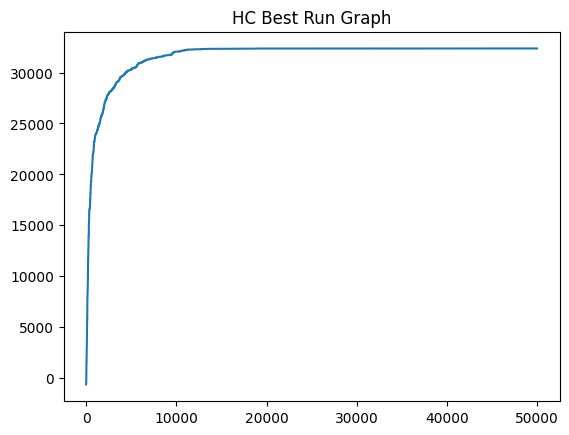

In [24]:
#sample plot for one seed using best 5 seed average parameters
set_seed(0)
best_solution, history = HC(f, integer_init, int_nbr_one_day, 50000, 0.2)
total_profit, sh = f(best_solution, return_history=True)
print(f'Total profit: {total_profit}')
plt.plot(history)
plt.title('HC Best Run Graph');

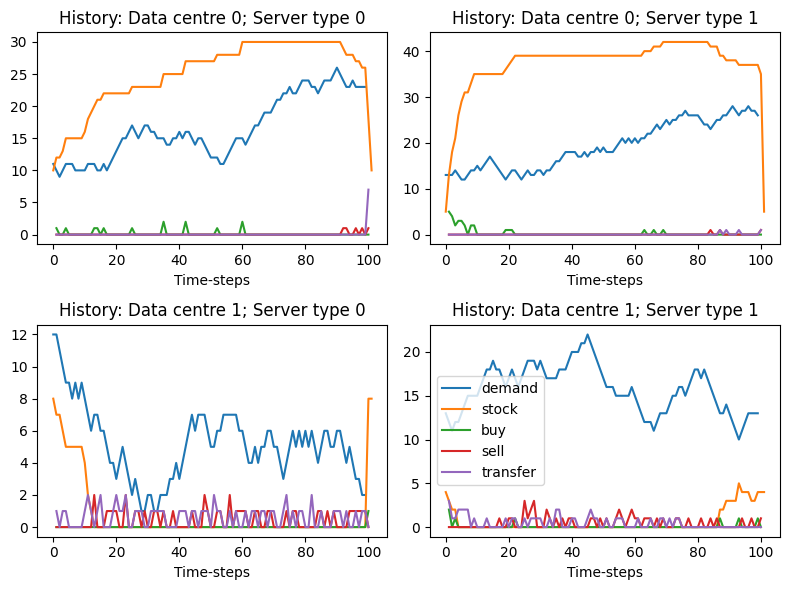

In [25]:
plot_history(demand, sh, best_solution)

#### SA Experiment

In [26]:
nbr_functions = [bin_nbr_one_flip, int_nbr_one_day, int_nbr_every_day, int_nbr_both_dc_everyday]
SA_params = {'init': integer_init, 'it_list' : [10000, 50000], 'T': [100,500,1000,2500], 'a': [0.99,0.999], 'zero_probs' : [0.5]}


In [27]:
# THE NEXT LINE IS COMMENTED OUT AS IT TAKES AN EXTENDED PERIOD OF TIME TO RUN, ALL RESULTS CAN BE VIEWED IN THE MATCHING DATAFRAME
# TIME TAKEN - 550m

# run_experiment(algorithm=SA, params=SA_params, nbr_funcs=nbr_functions, objective=f, path='SA_results_zero_probs_2.csv')

In [28]:
df_SA = pd.read_csv('SA_results_zero_probs.csv', index_col=0)
results = df_SA.groupby(['algorithm', 'zero_prob', 'nbr_func', 'its', 'temperature', 'alpha']).mean().sort_values(by='total_profit', ascending=False).drop(columns='seed').head(96)
results.head(25)

total_profit
algorithm zero_prob nbr_func         its   temperature alpha              
SA        0.5       int_nbr_one_day  50000 1000        0.990       32670.0
                                           100         0.999       32636.6
                                           2500        0.990       32634.2
                                           500         0.990       32612.0
                                           100         0.990       32602.4
                                           1000        0.999       32566.6
                                           500         0.999       32468.8
                                           2500        0.999       32084.8
                                     10000 100         0.990       31884.4
                                           2500        0.990       31871.8
                                           1000        0.990       31778.4
                                           500         0.990       31593.8
                                           100         0.999       31070.6
                    bin_nbr_one_flip 50000 500         0.990       31028.2
                                           100         0.999       31003.4
                                                       0.990       30739.4
                                           1000        0.990       30603.8
                                     10000 100         0.990       29986.4
                                           500         0.990       29879.8
                    int_nbr_one_day  10000 500         0.999       29528.4
                    bin_nbr_one_flip 50000 2500        0.990       29305.6
                                     10000 1000        0.990       29297.2
                                     50000 500         0.999       29279.0
                                     10000 100         0.999       28755.0
                    int_nbr_one_day  10000 1000        0.999       28277.0

In [29]:
results.tail(10)

total_profit
algorithm zero_prob nbr_func                 its   temperature alpha              
SA        0.5       int_nbr_both_dc_everyday 50000 1000        0.999       11436.4
                    int_nbr_every_day        10000 1000        0.999       11072.8
                                             50000 1000        0.999       11072.8
                                             10000 2500        0.999        7892.6
                                             50000 2500        0.999        7892.6
                                             10000 2500        0.990        7569.6
                    int_nbr_both_dc_everyday 10000 2500        0.999        7515.6
                                             50000 2500        0.999        7515.6
                                                               0.990        7451.6
                                             10000 2500        0.990        7451.6

#### SA Results Discussion

The best SA algorithm parameters result in an average profit of `32670.0`, which is around 400 more than the best HC average (`32284.40`). This difference could be attributed to the fact that the HC algorithm gets stuck in local optima due to its purely exploitative nature. In contrast, the SA algorithm explores the search space more extensively, allowing it to find better solutions beyond it's original local optimum.

Analyzing the worst SA parameter settings, a combination of high temperature and high alpha appears to yield the poorest results. This observation makes sense because a high temperature coupled with a high alpha does not decrease effectively, causing the algorithm to continue exploring without adequately exploiting once a good solution is found. When selecting temperature and alpha values, both parameters must be carefully considered in relation to each other.

Examining the plots for a good SA solution, we notice that data center 1 (server type 0) engages in a significant number of selling and transferring operations.


#### SA Best Profit Plots

Simulated Annealing with: int_nbr_one_day, temp(1000), alpha(0.99), zero_prop(0.5): 100%|██████████| 50000/50000 [01:41<00:00, 491.25it/s]


Total profit: 32799


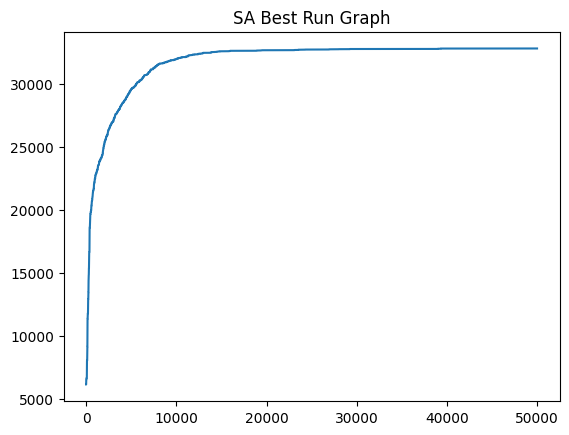

In [53]:
# sample plot for one seed using best 5 seed average parameters
set_seed(1)
best_solution, history = SA(f, integer_init, int_nbr_one_day, 50000, 1000, 0.99, 0.5)
total_profit, sh = f(best_solution, return_history=True)
print(f'Total profit: {total_profit}')
plt.plot(history)
plt.title('SA Best Run Graph');

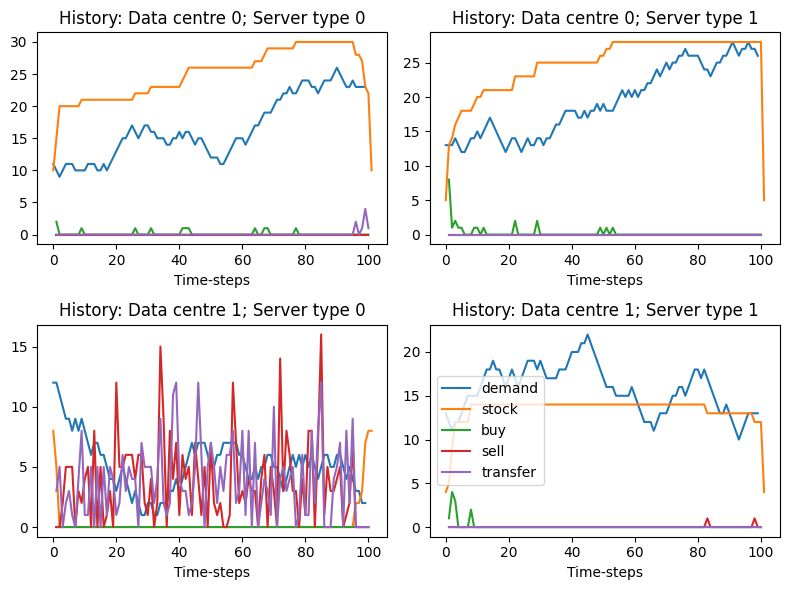

In [31]:
plot_history(demand, sh, best_solution)

## Run and Evaluate GA (10k & 50k)

Due to the anticipated length of the GA experiement with 50k iterations, we decided to split our experimention into 2 chunks. Firstly, an exploratory experiment with only 10k iterations per run in an attempt to ascertain the best parameters to use for the longer and more impactful experiment. The culling of some of the parameters, as well as the reason why, will be discussed following the 10k experiment below.

#### GA 10k Experiment

In [32]:
nbr_functions = [ int_nbr_every_day, int_nbr_one_day, int_nbr_both_dc_everyday, int_nbr_everything]
GA_params_10k = {'init': integer_init, 'it_list' : [10000], 'pop_size' : [100,200,500],'enum':[5,10,25,50,100], 'crossovers':[uniform_crossover], 'selections' : [tournament_select], 'pmut' : [0.01,0.05], 'zero_probs' : [0.1, 0.5], 't_size': [5,10,25]}

In [33]:
# THE NEXT LINE IS COMMENTED OUT AS IT TAKES AN EXTENDED PERIOD OF TIME TO RUN, ALL RESULTS CAN BE VIEWED IN THE MATCHING DATAFRAME
# TIME TAKEN - 20hrs

# run_experiment(algorithm=GA, params=GA_params_10k, nbr_funcs=nbr_functions, objective=f, path='GA_results_zero_probs_10k.csv')

In [34]:
df_GA = pd.read_csv('GA_results_zero_probs_10k.csv', index_col=0)
results = df_GA.groupby(['algorithm', 'its', 'selection', 'nbr_func', 'elitism_enum', 'crossover', 'popsize', 'pmut', 'tsize', 'zero_prob']).mean().sort_values(by='total_profit', ascending=False).drop(columns='seed')
results.head(25)

total_profit
algorithm its   selection         nbr_func                 elitism_enum crossover         popsize pmut tsize zero_prob              
GA        10000 tournament_select int_nbr_every_day        5            uniform_crossover 100     0.05 5     0.1             29259.0
                                                           10           uniform_crossover 100     0.05 10    0.1             29125.8
                                                                                          200     0.05 10    0.1             29124.6
                                  int_nbr_both_dc_everyday 25           uniform_crossover 200     0.05 5     0.1             29064.0
                                  int_nbr_every_day        25           uniform_crossover 100     0.05 5     0.1             29032.8
                                                           5            uniform_crossover 200     0.05 5     0.1             28952.2
                                                           10           uniform_crossover 100     0.05 5     0.1             28923.4
                                  int_nbr_both_dc_everyday 5            uniform_crossover 200     0.05 5     0.1             28913.6
                                  int_nbr_every_day        10           uniform_crossover 200     0.05 5     0.1             28907.6
                                  int_nbr_both_dc_everyday 10           uniform_crossover 200     0.05 5     0.1             28862.6
                                  int_nbr_every_day        5            uniform_crossover 100     0.05 10    0.1             28829.4
                                                           25           uniform_crossover 200     0.05 10    0.1             28777.0
                                                           5            uniform_crossover 200     0.05 10    0.1             28740.4
                                                           25           uniform_crossover 200     0.05 5     0.1             28731.0
                                  int_nbr_both_dc_everyday 10           uniform_crossover 200     0.05 10    0.1             28722.6
                                                           5            uniform_crossover 100     0.05 5     0.1             28688.8
                                  int_nbr_every_day        10           uniform_crossover 200     0.05 25    0.1             28667.6
                                  int_nbr_both_dc_everyday 5            uniform_crossover 100     0.05 10    0.1             28619.8
                                  int_nbr_every_day        25           uniform_crossover 100     0.05 10    0.1             28596.6
                                  int_nbr_everything       25           uniform_crossover 200     0.05 5     0.1             28591.2
                                  int_nbr_every_day        5            uniform_crossover 100     0.05 25    0.1             28572.8
                                                           25           uniform_crossover 100     0.05 25    0.1             28557.6
                                  int_nbr_both_dc_everyday 50           uniform_crossover 200     0.05 10    0.1             28541.2
                                  int_nbr_every_day        10           uniform_crossover 100     0.05 25    0.1             28512.0
                                  int_nbr_both_dc_everyday 50           uniform_crossover 200     0.05 5     0.1             28485.0

#### GA 10k Results Discussion

The numerical results from the 10k iteration GA experiment show an average profit of around `29000`. This result is lower than those achieved using the GA and SA approaches. The purpose of the 10k GA experiment is to help narrow down effective hyperparameters, as GA requires significantly more computation time.
Looking at the graphical results of the best run, we notice that operations such as buying, selling, or transferring occur almost every day. The neighbor functions `int_nbr_every_day` and `int_nbr_both_dc_everyday` seem to perform very well regardless of the hyperparameters, indicating that they are good choices for consistent performance.

In general, smaller `tsize` values seem to work better than larger ones. Based on this observation, we added a `tsize` of 3 as a possible hyperparameter for the 50k GA experiment.

#### GA 10k Best Result Plots

Genetic Algorithm with: int_nbr_every_day, uniform_crossover, <lambda>, enum (5), popsize (200), pmut (0.05), ngens (50), zero_prop(0.1): 100%|██████████| 49/49 [00:18<00:00,  2.64it/s]


The total profit for this run is : 29029


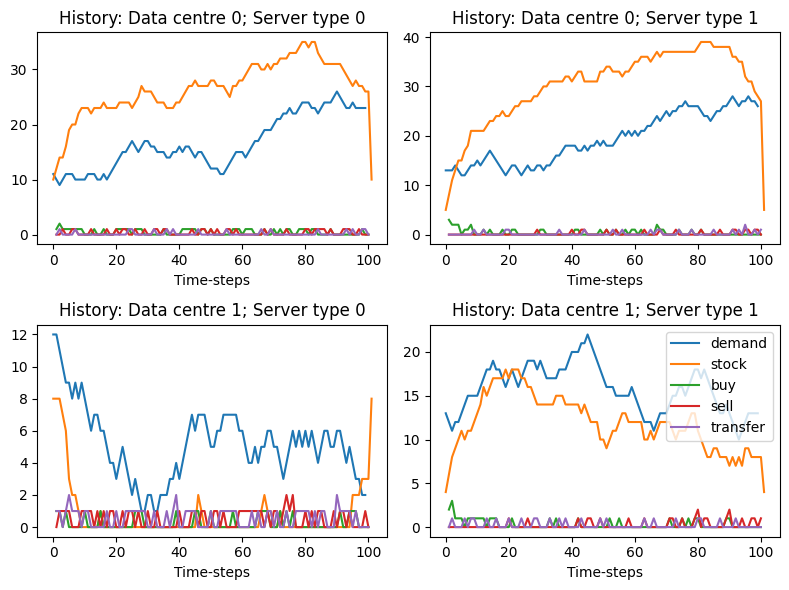

In [35]:
# GA 10k server history plot
set_seed(2)
pop = 200
ngens = int(10000/pop)
best_solution, _ = GA(f=f,init=integer_init, nbr=int_nbr_every_day, enum=5,crossover=uniform_crossover,select=lambda pop: tournament_select(pop, 5),popsize=pop,ngens=ngens, pmut=0.05,zero_prop=0.1)
total_profit, sh = f(best_solution, return_history=True)
print(f'The total profit for this run is :',total_profit)
plot_history(demand, sh, best_solution)

#### GA 50k Experiment

In [36]:
nbr_functions = [ int_nbr_every_day, int_nbr_one_day, int_nbr_both_dc_everyday, int_nbr_everything]
GA_params_50k = {'init': integer_init, 'it_list' : [50000], 'pop_size' : [100,200],'enum':[5,10], 'crossovers':[uniform_crossover], 'selections' : [tournament_select], 'pmut' : [0.05], 'zero_probs' : [0.01,0.1], 't_size': [3,5]}

In [37]:
# THE NEXT LINE IS COMMENTED OUT AS IT TAKES AN EXTENDED PERIOD OF TIME TO RUN, ALL RESULTS CAN BE VIEWED IN THE MATCHING DATAFRAME
# TIME TAKEN - 18hrs

#run_experiment(algorithm=GA, params=GA_params_50k, nbr_funcs=nbr_functions, objective=f, path='GA_results_zero_probs_50k_2.csv')

In [38]:
df_GA = pd.read_csv('GA_results_zero_probs_50k.csv', index_col=0)
df_GA.groupby(['algorithm', 'its', 'selection', 'nbr_func', 'elitism_enum', 'crossover', 'popsize', 'pmut', 'tsize', 'zero_prob']).mean().sort_values(by='total_profit', ascending=False).drop(columns='seed')

total_profit
algorithm its   selection         nbr_func                 elitism_enum crossover         popsize pmut tsize zero_prob              
GA        50000 tournament_select int_nbr_every_day        10           uniform_crossover 200     0.05 5     0.01            32707.0
                                                           5            uniform_crossover 100     0.05 3     0.01            32705.4
                                  int_nbr_both_dc_everyday 5            uniform_crossover 100     0.05 3     0.01            32689.0
                                  int_nbr_every_day        5            uniform_crossover 200     0.05 3     0.01            32686.0
                                  int_nbr_both_dc_everyday 5            uniform_crossover 200     0.05 5     0.01            32672.8
                                                           10           uniform_crossover 200     0.05 5     0.01            32629.4
                                  int_nbr_every_day        10           uniform_crossover 200     0.05 3     0.01            32607.0
                                                           5            uniform_crossover 200     0.05 5     0.01            32599.4
                                  int_nbr_both_dc_everyday 5            uniform_crossover 200     0.05 3     0.01            32548.4
                                                           10           uniform_crossover 200     0.05 3     0.01            32523.2
                                  int_nbr_everything       5            uniform_crossover 200     0.05 3     0.01            32386.8
                                                           10           uniform_crossover 200     0.05 3     0.01            32384.6
                                                           5            uniform_crossover 200     0.05 5     0.01            32335.0
                                                           10           uniform_crossover 200     0.05 5     0.01            32331.2
                                                           5            uniform_crossover 100     0.05 3     0.01            32277.6
                                  int_nbr_every_day        10           uniform_crossover 200     0.05 3     0.10            31405.6
                                                           5            uniform_crossover 200     0.05 3     0.10            31350.0
                                                                                                       5     0.10            31318.0
                                                           10           uniform_crossover 200     0.05 5     0.10            31202.6
                                  int_nbr_both_dc_everyday 5            uniform_crossover 200     0.05 3     0.10            30590.2
                                                           10           uniform_crossover 200     0.05 3     0.10            30497.2
                                                                                                       5     0.10            30180.4
                                                           5            uniform_crossover 200     0.05 5     0.10            30141.2
                                  int_nbr_one_day          10           uniform_crossover 200     0.05 3     0.01            29721.6
                                                                                                             0.10            29707.8
                                                                                                       5     0.10            29685.0
                                                           5            uniform_crossover 200     0.05 3     0.10            29666.4
                                                           10           uniform_crossover 200     0.05 5     0.01            29630.6
                                                           5            uniform_crossover 200     0.05 3     0.01            29546

#### GA 50k Results Discussion

For the results of our biggest experiment to date, the Genetic Algorithm with 50k iterations, there are a number of important things to mention. Firstly, as is obvious from the above dataframe, the results improved over previous experiments. Over a 5 seed average, using the ``int_nbr_every_day`` nbr function, ``10 elites``, ``a population of 200``, ``pmut of 0.05``, ``a tournament size of 5`` and a ``zero_prob of 0.01`` we managed to achieve a result of ``32707``. This was an improvement of only 37 over our SA experiment, however it still marked a trio of improvements from HC to SA to GA. A number of factors could potentially have contributed to this improved result from the implementation of elitism to overall hyperparameter tuning as well as general search space exploration.

In this experiment, we also used two values of ``zero_probs``, ``0.1`` and ``0.01``, the latter outperforming the former in nearly every scenario. This confirms our prior assumption of 0s benefitting the profit of an overall solution, providing valuable domain knowledge that could be useful in a variety of scenarios in the application of other algorithms in the future.

Finally, as for the plot of one of our best overall single runs, we can observe a greater prominence of flat regions, as well as a lessening in both operation size and count. This is a phenomenon we will discuss in greater detail in the final conclusions.

#### GA 50k Best Profit Plots

Genetic Algorithm with: int_nbr_every_day, uniform_crossover, <lambda>, enum (5), popsize (100), pmut (0.05), ngens (500), zero_prop(0.01): 100%|██████████| 499/499 [01:37<00:00,  5.11it/s]


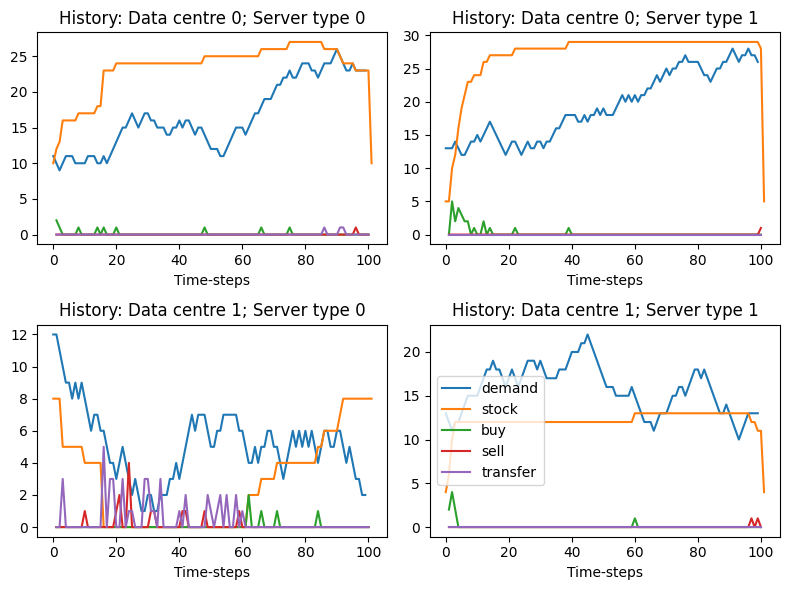

In [39]:
set_seed(3)
pop = 100

ngens = int(50000/pop)
best_solution, _ = GA(
                        f=f, 
                        init=integer_init, 
                        nbr=int_nbr_every_day, 
                        enum=5,
                        crossover=uniform_crossover,
                        select=lambda pop: tournament_select(pop, 3), 
                        popsize=pop,
                        ngens=ngens, 
                        pmut=0.05,
                        zero_prop=0.01
                    )
total_profit, sh = f(best_solution, return_history=True)

plot_history(demand, sh, best_solution)

----------------------------
## Our Novel Approaches 

### Hybrid GA with HC

As our first novel approach to this problem, we decided to implement a hybrid approach between two techniques, the Genertic Algorithm (with elitism) and a standard Hill Climber. The concept for this ensemble of techniques was simple : Due to the relatively strong performance of our basic Hill Climber algorithm in comparison with more explorative approaches, we decided to try and tip the balance of the experiment towards exploitation rather than exploration. To this end, as our GA has thus far yielded the best results (if only marginally), we decided to try to increase the exploitation of the algorithm by combining it with Hill Climbing. To do this, we put each outputted genome from the elitism function call through the HC algorithm before appending them to the next generation. We used a HC 'its' value of 3000 as it provided a decent balance between time-to-run and exploitation. This approach was intended to optimize sub-sections of our solution in each generation before moving on to the next one. 

In [40]:
#hybrid GA/HC approach 

def GA_HC(f, HC , init, nbr, crossover, enum, select, popsize, ngens, pmut, HC_its = 3000, zp  = 0.01):

    
    # history mechanism. best_ever is (f(x), x) (mirroring the structure in the population)
    best_ever = (-np.inf, None)
    hist = []

    # make initial population
    pop = [init() for _ in range(popsize)]
    pop = [(f(x), x) for x in pop]#fitnesses

    #tqdm loading bar and prints again
    for _ in tqdm(range(1, ngens), desc=f'Genetic Algorithm with: {nbr.__name__}, {crossover.__name__}, {select.__name__}, enum ({enum}), popsize ({popsize}), pmut ({pmut}), ngens ({ngens})', leave=True):
        # make an empty new population
        children = []

        #making of new generation
        while len(children) < popsize:
            
            #selection of best individuals for automatic qualification for next gen
            if len(children) == 0:
                elites = elitism_selection(pop, enum)#tuneable elitism
                for e in elites:
                    if random.random() < pmut:
                        e = nbr(e[1],zp)
                        e,_ = HC_GA(f,e,nbr,HC_its,zp)
                        children.append(e)
                    else:
                        e,_ = HC(f,e[1],nbr,HC_its,zp)
                        children.append(e)  # append the genome, not the fitness

            #normal selection and crossover process to fill the rest of the generation
            p1 = select(pop)[1]
            p2 = select(pop)[1]

            c1, c2 = crossover(p1, p2)

            # apply mutation to only a fraction of individuals
            if random.random() < pmut:
                c1 = nbr(c1, zp)
            if random.random() < pmut:
                c2 = nbr(c2, zp)

            # add the new individuals to the population
            children.append(c1)

            # ensure we don't make newpop of size (popsize+1)
            if len(children) < popsize:
                children.append(c2)

        # overwrite old population with new, evaluate, do stats
        pop = children
        pop = [(f(x), x) for x in pop] # new fitness evaluations
        
        # max will get the ind (f(x), x) with highest f(x)
        best = max(pop, key=lambda fx_x: fx_x[0])
        # compare against best_ever and add to history
        if best[0] > best_ever[0]:
            best_ever = best
        hist.append(best_ever[0])
        
    # return the best individual ever (just x, not f(x)) and the numerical array hist
    return best_ever[1], np.array(hist)

def HC_GA(f, x, nbr, its,zero_prob):
    '''
    f: objective function X -> R
    init: function giving random element x of X
    nbr: function X -> X, giving a neighbour of x
    its: number of iterations
    '''
    # setting up the binary decoder
    decoder_b2i = decode_binary_to_int if 'bin' in nbr.__name__ else lambda x: x 
    decoder_i2b = decode_int_to_binary if 'bin' in nbr.__name__ else lambda x: x 
    
    history = []
    fx = f(decoder_b2i(x)) # calculates profit
    
    for _ in tqdm(range(its), desc=f'Hill Climbing with {nbr.__name__}, zero_prob({zero_prob})', leave=True):
        xnew = nbr(x,zero_prob) # make new point by changing choosing a defined neighbour
        fxnew = f(decoder_b2i(xnew)) # calculates profit
        if fxnew > fx: # if it's better
            x = xnew # step to the new point
            fx = fxnew
        history.append(fx)

    return decoder_b2i(x), history

#### Hybrid GA/HC Results Discussion

In [41]:
# Best Singular GA Run from experiment , for comparison with GA/HC below
set_seed(3)
pop = 200

ngens = int(50000/pop)
best_solution, _ = GA(
                        f=f, 
                        init=integer_init, 
                        nbr=int_nbr_every_day, 
                        enum=5,
                        crossover=uniform_crossover,
                        select=lambda pop: tournament_select(pop, 3), 
                        popsize=pop,
                        ngens=ngens, 
                        pmut=0.05,
                        zero_prop=0.01
                    )
total_profit, _ = f(best_solution, return_history=True)
print(total_profit)

Genetic Algorithm with: int_nbr_every_day, uniform_crossover, <lambda>, enum (5), popsize (200), pmut (0.05), ngens (250), zero_prop(0.01): 100%|██████████| 249/249 [01:31<00:00,  2.72it/s]

32844


In [42]:
# THE FOLLOWING LINEs ARE COMMENTED OUT AS IT TAKES AN EXTENDED PERIOD OF TIME TO RUN, ALL RESULTS CAN BE VIEWED IN THE MATCHING DATAFRAME
# TIME TAKEN - 4hrs (single run!!!!! :( )


# random.seed(3)
# np.random.seed(3)
# pop = 100

# ngens = int(50000/pop)

# best_solution, _ = GA_HC(
# f, HC_GA, integer_init, 
# nbr=int_nbr_every_day,       
# enum=5,
# crossover=uniform_crossover,
# select=lambda pop: tournament_select(pop, 3), 
# popsize=pop,
# ngens=ngens, 
# pmut=0.05,
# zp = 0.01
# )


# total_profit, _ = f(best_solution, return_history=True)

In [43]:
df_GAHC = pd.read_csv('GA_HC_Hybrid_best_GA_run.csv', index_col=0)
df_GAHC


,total_profit,algorithm,nbr_func,its,seed,zero_prob,pop,tsize,pmut,enum
0,32799,GA_HC,int_nbr_every_day,50000,2,0.01,100,3,0.05,5


As is evident from the above cells, our changes to this algorithm made it horrendously time-inefficient, with some single runs (parameter dependent) taking up to 7 or 8 hours. However, we stand by it's merit to our experimentation as a whole, as it was, for us, an interesting first step in creating our own approach to taking results and knowledge gained about a problem from numerous previous experiments and applying them in our own way to improve results. 

Above is the result of this hybrid algorithm, the best singular run with parameters we found from our GA experiment. This is what we would use to compare the run of our approach to. The best GA run, as seen below, achieved 32710 in profit, while the hybrid achieved 32799. While this is a marginal improvement for a single run, the impracticality of the solution effectively nullifies this. Furthermore, due to the time constraints of running this algorithm, it is untested for other parameter combinations, meaning that it is possible that it could perform worse than a standard GA for some combinations.

----------------------

## Particle Swarm Optimisation

The code for the PSO algorithm was adapted from the code provided by [Induraj; Feb 23, 2023](https://induraj2020.medium.com/implementing-particle-swarm-optimization-in-python-c59278bc5846), who published the code on Medium. The code was originally written for a minimisation problem, but we adapted it to a our maximisation problem by changing the comparison operators and using max/argmax functions. We designed the real value algorithm to be able to handle integer solutions so that it could be used for our optimisation problem.

From the start, we initialise with an `init()` function, setting the initial velocities to 0, as we want the first velocities to be calculated based on the initial positions. When calculating the particles and velocities, it is possible to get real values, which we need to cast to integers, as our solution array can only contain integer values. This operation can also result in negative values within the solution array.
Since our solution array cannot contain negative values, we implemented a repair operator, which sets all negative values to 0 (effectively clipping the values). 

Thus, the major changes to a standard PSO algorithm are the integer casting and the repair operator to ensure values are >= 0. These changes are based on our assumption that a sparse solution should perform well, as every operation comes with a certain cost.

In [44]:
'''
PSO function is in parts taken from and modified from Medium.
Author: Induraj
URL: https://induraj2020.medium.com/implementing-particle-swarm-optimization-in-python-c59278bc5846
Date published: 23th Feb. 2023
Date accessed: 10th Nov. 2024
'''

def PSO(f, init, num_particles=30, max_iter=100, w=0.5, c1=3, c2=3):
    """
    f: fitness function to be maximized
    init: function to generate an initial particle (randomly)
    popsize: number of particles in the swarm
    ngens: number of generations (iterations)
    w: inertia weight
    c1: cognitive coefficient
    c2: social coefficient
    """
    
    # Initialize the swarm
    particles = np.array([init() for _ in range(num_particles)])
    velocities = particles.copy()*0
    
    # Initialize the best positions and fitness values
    best_positions = np.copy(particles)
    best_fitness = np.array([f(p) for p in particles])
    swarm_best_position = best_positions[np.argmax(best_fitness)]
    swarm_best_fitness = np.max(best_fitness)
    fit_history = [swarm_best_fitness]

    for _ in tqdm(range(max_iter), desc=f'PSO num_particles({num_particles}), w({w}), c1({c1}), c2({c2})', leave=True):
        # Update velocities
        r1 = np.random.uniform(0, 1, (num_particles, 100,2,2,3))
        r2 = np.random.uniform(0, 1, (num_particles, 100,2,2,3))
        velocities = w * velocities + c1 * r1 * (best_positions - particles) + c2 * r2 * (swarm_best_position - particles)

        # Update positions
        particles = np.rint(particles + velocities).astype(int) # round to nearest integer (since we can't have fractional servers)
        particles = np.maximum(particles, 0) # ensure we dont have negative operations (repair operator)

        # Evaluate fitness of each particle
        fitness_values = np.array([f(p) for p in particles])

        # Update best positions and fitness values
        improved_indices = np.where(fitness_values > best_fitness)
        best_positions[improved_indices] = particles[improved_indices]
        best_fitness[improved_indices] = fitness_values[improved_indices]
        if np.max(fitness_values) > swarm_best_fitness:
            swarm_best_position = particles[np.argmax(fitness_values)]
            swarm_best_fitness = np.max(fitness_values)
            fit_history.append(swarm_best_fitness)

    # Return the best solution found by the PSO algorithm
    return swarm_best_position, swarm_best_fitness, fit_history

In [45]:
def run_PSO(path):

    #hyperparameters
    num_particless = [500, 100]
    c2s = [3, 2.5, 2, 1.5, 1]
    c1s = [3, 2.5, 2, 1.5, 1]
    ws = [0.8, 1.0, 1.2]

    results = pd.DataFrame()
    for num_particles, c1, c2, w in itertools.product(num_particless, c1s, c2s, ws):
        for seed in range(5):
            set_seed(seed)
            _, swarm_best_fitness, _ = PSO(f, integer_init, max_iter=75, num_particles=num_particles, w=w, c1=c1, c2=c2)
            result_row = {'num_particles': num_particles, 'c1': c1, 'c2': c2, 'w': w, 'seed': seed, 'max_iter': 75, 'fitness': swarm_best_fitness,}
            results = pd.concat([results, pd.DataFrame([result_row])], ignore_index=True)
            results.to_csv(path)



In [46]:
# THE FOLLOWING LINE IS COMMENTED OUT AS IT TAKES AN EXTENDED PERIOD OF TIME TO RUN, ALL RESULTS CAN BE VIEWED IN THE MATCHING DATAFRAME
# TIME TAKEN - 31hrs

# run_PSO('PSO_results.csv')

#### 5 Seed Averaged PSO Results

In [47]:
df_PSO = pd.read_csv('PSO_results.csv', index_col=0).reset_index().drop(columns='index')
results = df_PSO.groupby(['max_iter', 'num_particles', 'c1', 'c2', 'w']).mean().sort_values(by='fitness', ascending=False).drop(columns='seed')
results.head(25)

fitness
max_iter num_particles c1  c2  w           
75       500           2.5 2.0 1.0  32851.2
                       1.5 1.0 1.2  32838.8
                       1.0 2.0 1.2  32826.8
                       3.0 2.5 1.2  32819.4
         100           3.0 2.0 1.0  32813.6
         500           3.0 2.5 0.8  32798.8
                           2.0 1.2  32795.2
                       2.5 1.0 1.2  32792.8
                       3.0 3.0 0.8  32791.4
                       2.0 2.5 0.8  32791.2
                           1.5 1.2  32790.0
         100           2.5 2.5 1.0  32789.8
         500           2.0 2.5 1.0  32770.4
                           1.0 1.2  32769.0
                       3.0 2.0 1.0  32767.4
                       1.5 2.0 1.0  32764.0
                       3.0 1.5 1.2  32761.0
         100           2.5 2.0 1.2  32759.2
         500           2.5 3.0 0.8  32756.0
                       1.5 3.0 1.0  32746.0
         100           2.0 2.5 1.0  32745.8
         500           2.5 1.5 0.8  32741.0
                           2.5 1.0  32738.0
                       3.0 1.5 1.0  32724.2
                       2.0 2.0 1.0  32722.4

In [48]:
results.tail(25)

fitness
max_iter num_particles c1  c2  w           
75       100           1.0 3.0 0.8  32398.4
                           1.5 1.0  32397.2
                       2.5 1.0 0.8  32396.4
                       1.0 1.0 1.2  32391.6
         500           1.0 1.0 0.8  32382.8
         100           2.0 2.0 1.2  32378.0
                       2.5 2.5 1.2  32372.4
                       2.0 3.0 1.2  32370.2
                       1.0 1.5 1.2  32345.4
                       1.5 2.5 1.0  32333.2
                       2.0 1.0 0.8  32311.4
         500           1.5 3.0 1.2  32305.4
         100           1.5 1.5 0.8  32297.0
                       2.0 2.5 1.2  32290.2
                       1.5 3.0 0.8  32279.4
                       1.0 2.0 0.8  32225.4
                       1.5 3.0 1.2  32224.8
                               1.0  32216.0
                           2.0 0.8  32215.4
                           1.0 0.8  32201.6
                       2.5 3.0 1.2  32176.0
                       1.0 2.5 0.8  32102.4
                           1.5 0.8  32095.8
                       1.5 2.5 1.2  32067.6
                       1.0 1.0 0.8  31785.4

#### Single Seed Best PSO Result

In [49]:
df_PSO[df_PSO['fitness'] == 32962.0]

,num_particles,c1,c2,w,seed,max_iter,fitness
55,500,2.5,1.5,1.2,0,75,32962
82,500,3.0,3.0,1.0,2,75,32962
226,500,1.5,3.0,0.8,1,75,32962
231,500,1.5,3.0,1.0,1,75,32962
343,500,1.0,2.0,1.2,3,75,32962
680,100,2.0,3.0,1.0,0,75,32962


#### PSO Best Profit Plot

PSO num_particles(500), w(1.2), c1(2.5), c2(1.5): 100%|██████████| 75/75 [01:03<00:00,  1.19it/s]


Total profit: 32962


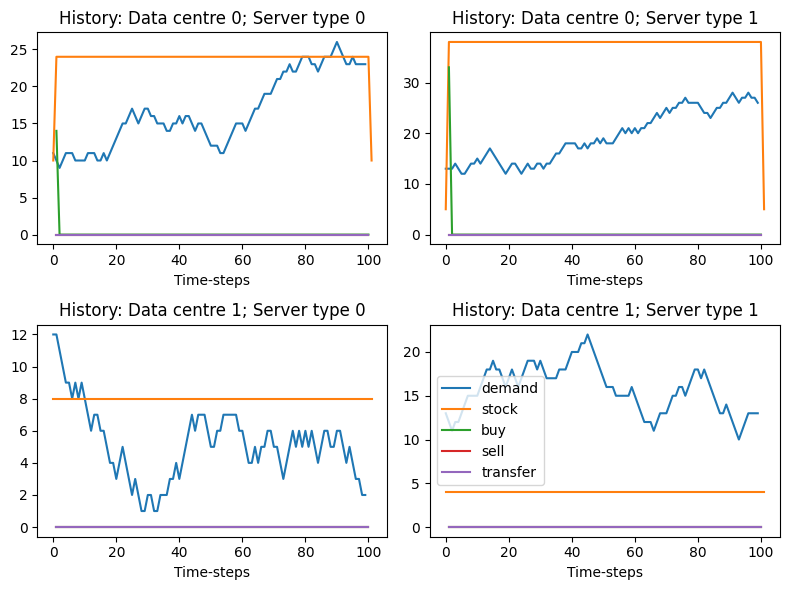

In [50]:
# sample plot for one seed using best 5 seed average parameters 
set_seed(0)
absolute_best_solution_found, _, hist = PSO(f, integer_init, max_iter=75, num_particles=500, w=1.2, c1=2.5, c2=1.5)
total_profit, sh = f(absolute_best_solution_found, return_history=True)
print(f'Total profit: {total_profit}')
plot_history(demand, sh, absolute_best_solution_found)

In [51]:
#taking a look at first day (as we can see in graph these are the only operations ever done)
absolute_best_solution_found[0]

array([[[14,  0,  0],
        [33,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0]]])

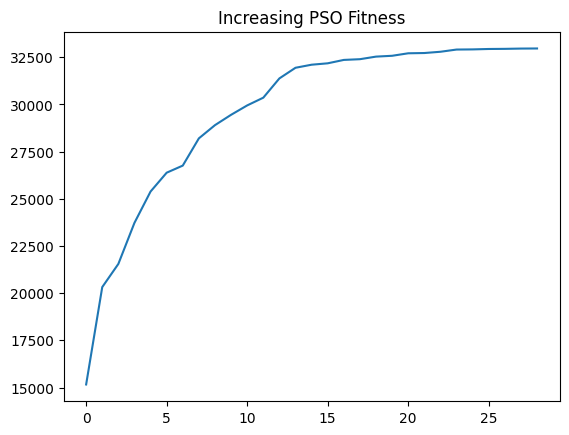

In [52]:
# plot the profit history
plt.plot(hist)
plt.title('Increasing PSO Fitness')
plt.show()

#### PSO Results Discussion
Taking a look at the numerical results, we see that the PSO algorithm, with the following parameters:
`its=75`, `particle_num=500`, `c1=2.5`, `c2=2.0`, `w=1.0`, produces the best average total profit of `32851.2` across all 5 seeds. The worst solutions with the chosen hyperparameters yield a profit around `31800`.

In the dataframe, there are 6 runs that all achieved the highest measured profit of `32962`. This indicates that `32962` is at least a local optimium. Examining this `absolute_best_solution_found`, we notice there are only two operations in the entire solution. These involve buying 14 and 33 servers on the first day with no other subsequent actions. This suggests that transferring and selling servers actually damage overall profit in our specific problem. 

The reason for this behavior lies in the cost structure. Since the cost of transferring a server twice (from high latency DC to the low latency, in order to handle all demand, and then back at the end of the timesteps to satisfy the condition that final server counts must equal the initial server counts) is equal to the cost of buying a new server and then selling it. While tranfering results in the same number of servers we had initially, buying and selling a server results in one more server that can satify the demand thoughout the 100 days. Instead of transferring, we can simply buy a new server at the beginning and then sell it at the end for the same cost, effectively increasing the total number of servers by 1 for the same expense. This approach is constrained by the requirement to finish with the same number of servers we started with and that the low-latency datacenter can satify the high-latency datacenter's demand.

We also observe this in the graph of the `absolute_best_solution_found`, where no actions are taken at all for the high-latency datacenters. 

For this specific problem, our modified PSO algorithm seems to perform exceptionally well, producing a very sparse solution.

## Final Conclusion

To recap over out solution as a whole, we used three 'basic' algorithms (HC, SA, GA) to explore and understand the problem presented to us. Following these initial learnings, we then attempted to implement some approaches, novel to this problem at least (GA/HC & PSO), to improve our results, which gave us a final max profit for a single run of `32962` (achieved in six separate runs). Below we will attempt to tie all ends together regarding our understanding of the problem and the results we achieved. 

#### What We Learned

While doing this assignment we observed an evolution of each algorithm's 'optimal' solution. From graph to graph, operation counts and sizes become increasingly smaller, culminating in a solution with only two operations over the entirety of the array. Furthermore, we also believe that an imbalance in the favour of exploration negatively affects our final profit, as an increase in exploration causes a greater number of operation values to deviate further from a value of 0. This imbalance is also the reason behind the binary nbr functions' poor performances, as they favour exploration over exploitation. We have established this is not optimal for the final solution, as we wish to have an extremely sparse array at the end of any given run. 


#### What Could Be Done Better In The Future

In the future, we would suggest a number of approaches to potentially increase performance :
  - A wider variation of nbr functions.
  - Alterations to the objective function to implement our learnings (punish selling and transferring).
  - As we do not know whether our result is the global optima or not, further testing with hyperparameters could prove fruitful [ if you will sponsor some GPUs for us :) ]
